# Red Wine Quality Prediction

### Data description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. The task is  to determine which physiochemical properties make a wine 'good'!

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
df=pd.read_csv("redwine_quality")

### Attribute Information

Input variables (based on physicochemical tests):<br>
1 - fixed acidity<br>
2 - volatile acidity<br>
3 - citric acid<br>
4 - residual sugar<br>
5 - chlorides<br>
6 - free sulfur dioxide<br>
7 - total sulfur dioxide<br>
8 - density<br>
9 - pH<br>
10 - sulphates<br>
11 - alcohol<br>
Output variable (based on sensory data):<br>
12 - quality (score between 0 and 10)

### Conventions

* Wine quality at 7 or higher are classified as good and remaining are not good.


### Exploratory Data Analysis

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


This shows the first five rows of the dataset.

In [4]:
df.shape

(1599, 12)

There are 1599 rows and 12 columns in the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


This describes the information of the the columns of the dataset. It shows the column names, count and datatype.

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


This gives the statistical information of the data.

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values in this dataset.

In [8]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


This shows the correlation between the columns in the dataset.

In [9]:
df.cov()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,3.031416,-0.079851,0.227820,0.281756,0.007679,-2.800921,-6.482346,0.002195,-0.183586,0.054010,-0.114421,0.174424
volatile acidity,-0.079851,0.032062,-0.019272,0.000484,0.000517,-0.019674,0.450426,0.000007,0.006495,-0.007921,-0.038600,-0.056476
citric acid,0.227820,-0.019272,0.037947,0.039434,0.001869,-0.124252,0.227697,0.000134,-0.016298,0.010328,0.022815,0.035612
residual sugar,0.281756,0.000484,0.039434,1.987897,0.003690,2.758611,9.416441,0.000945,-0.018644,0.001321,0.063219,0.015635
chlorides,0.007679,0.000517,0.001869,0.003690,0.002215,0.002738,0.073387,0.000018,-0.001926,0.002962,-0.011092,-0.004900
free sulfur dioxide,-2.800921,-0.019674,-0.124252,2.758611,0.002738,109.414884,229.737521,-0.000433,0.113653,0.091592,-0.773698,-0.427907
total sulfur dioxide,-6.482346,0.450426,0.227697,9.416441,0.073387,229.737521,1082.102373,0.004425,-0.337699,0.239471,-7.209298,-4.917237
density,0.002195,0.000007,0.000134,0.000945,0.000018,-0.000433,0.004425,0.000004,-0.000100,0.000048,-0.000998,-0.000267
pH,-0.183586,0.006495,-0.016298,-0.018644,-0.001926,0.113653,-0.337699,-0.000100,0.023835,-0.005146,0.033832,-0.007198
sulphates,0.054010,-0.007921,0.010328,0.001321,0.002962,0.091592,0.239471,0.000048,-0.005146,0.028733,0.016907,0.034413


This shows the covariance between the columns in the dataset.

#### Grouping all the variables with the target variable

In [10]:
print("fixed acidity\n")
print(df.groupby(["quality"])["fixed acidity"].mean())

fixed acidity

quality
3    8.360000
4    7.779245
5    8.167254
6    8.347179
7    8.872362
8    8.566667
Name: fixed acidity, dtype: float64


In [11]:
print("volatile acidity\n")
print(df.groupby(["quality"])["volatile acidity"].mean())

volatile acidity

quality
3    0.884500
4    0.693962
5    0.577041
6    0.497484
7    0.403920
8    0.423333
Name: volatile acidity, dtype: float64


In [12]:
print("citric_acid\n")
print(df.groupby(["quality"])["citric acid"].mean())

citric_acid

quality
3    0.171000
4    0.174151
5    0.243686
6    0.273824
7    0.375176
8    0.391111
Name: citric acid, dtype: float64


In [13]:
print("residual sugar\n")
print(df.groupby(["quality"])["residual sugar"].mean())

residual sugar

quality
3    2.635000
4    2.694340
5    2.528855
6    2.477194
7    2.720603
8    2.577778
Name: residual sugar, dtype: float64


In [14]:
print("chlorides\n")
print(df.groupby(["quality"])["chlorides"].mean())

chlorides

quality
3    0.122500
4    0.090679
5    0.092736
6    0.084956
7    0.076588
8    0.068444
Name: chlorides, dtype: float64


In [15]:
print("free sulfur dioxide\n")
print(df.groupby(["quality"])["free sulfur dioxide"].mean())

free sulfur dioxide

quality
3    11.000000
4    12.264151
5    16.983847
6    15.711599
7    14.045226
8    13.277778
Name: free sulfur dioxide, dtype: float64


In [16]:
print("total sulfur dioxide\n")
print(df.groupby(["quality"])["total sulfur dioxide"].mean())

total sulfur dioxide

quality
3    24.900000
4    36.245283
5    56.513950
6    40.869906
7    35.020101
8    33.444444
Name: total sulfur dioxide, dtype: float64


In [17]:
print("density\n")
print(df.groupby(["quality"])["density"].mean())

density

quality
3    0.997464
4    0.996542
5    0.997104
6    0.996615
7    0.996104
8    0.995212
Name: density, dtype: float64


In [18]:
print("pH\n")
print(df.groupby(["quality"])["pH"].mean())

pH

quality
3    3.398000
4    3.381509
5    3.304949
6    3.318072
7    3.290754
8    3.267222
Name: pH, dtype: float64


In [19]:
print("sulphates\n")
print(df.groupby(["quality"])["sulphates"].mean())

sulphates

quality
3    0.570000
4    0.596415
5    0.620969
6    0.675329
7    0.741256
8    0.767778
Name: sulphates, dtype: float64


In [20]:
df['quality'].value_counts() 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

This shows that there are 681 wines of quality 5, 638 wines of quality 6, 199 wines of quality 7, 53 wines of quality 4, 18 wines of quality 8 and 3 wines of quality 10.

<AxesSubplot:xlabel='quality', ylabel='count'>

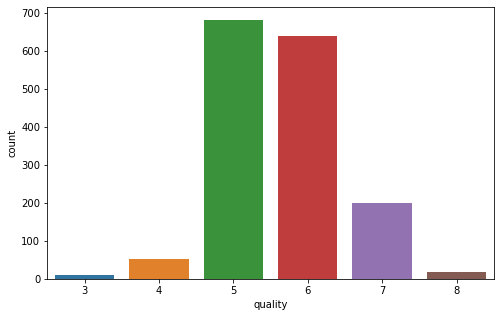

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=df, order=[3, 4, 5, 6, 7, 8] )

We can see that the data is imbalanced.

### Data Pre-Processing

In [22]:
df_3 = df[df.quality==3]     # There are very few wines of quality 3          
df_4 = df[df.quality==4]     # There are few wines of quality 4          
df_5 = df[df.quality==5]     # There are many wines of quality 5
df_6 = df[df.quality==6]     # There are many wines of quality 6
df_7 = df[df.quality==7]     # There are less quantity of wines of quality 7
df_8 = df[df.quality==8]     # There are few wines of quality 8

#### Balancing data

Here I am considering less quantity as minority and more quantity as majority.

In [23]:
#Upsampling the minority class to make balanced data

In [25]:
from sklearn.utils import resample

In [26]:
df_3_upsampled = resample(df_3, replace=True, n_samples=600, random_state=12) 
df_4_upsampled = resample(df_4, replace=True, n_samples=600, random_state=12) 
df_7_upsampled = resample(df_7, replace=True, n_samples=600, random_state=12) 
df_8_upsampled = resample(df_8, replace=True, n_samples=600, random_state=12) 

In [27]:
#Downsampling the minority class to make balanced data i.e., decreasing the rows of majority class to make balance data

In [28]:
df_5_downsampled = df[df.quality==5].sample(n=600).reset_index(drop=True)
df_6_downsampled = df[df.quality==6].sample(n=600).reset_index(drop=True)

In [29]:
# Combining downsampled majority class with upsampled minority class

In [30]:
Balanced_df = pd.concat([df_3_upsampled, df_4_upsampled, df_7_upsampled, df_8_upsampled, df_5_downsampled, df_6_downsampled]).reset_index(drop=True)
 
# Display new class counts
Balanced_df.quality.value_counts()           # Prints the count of different classes in 'quality'

7    600
5    600
3    600
8    600
6    600
4    600
Name: quality, dtype: int64

In [31]:
Balanced_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3


### Analysis of Target Variable

#### Bar Plot


<AxesSubplot:xlabel='quality', ylabel='count'>

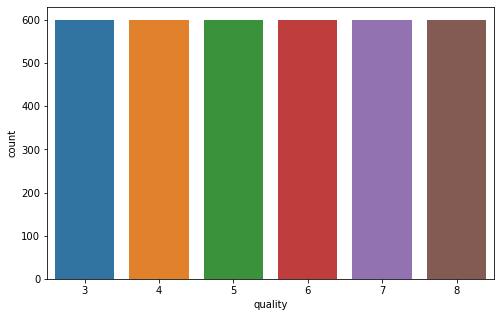

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=Balanced_df, order=[3, 4, 5, 6, 7, 8] )

Now, we can see that the data is balanced.

#### Hist plot

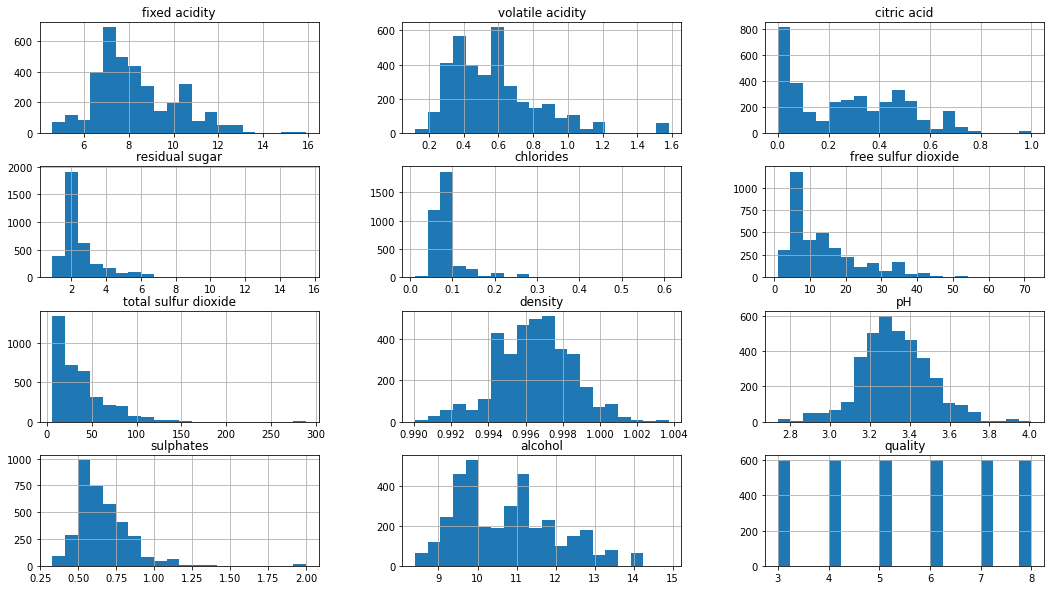

In [33]:
Balanced_df.hist(bins=20, figsize=(18,10))
plt.show()

This shows the distribution of sample data

#### Heatmap

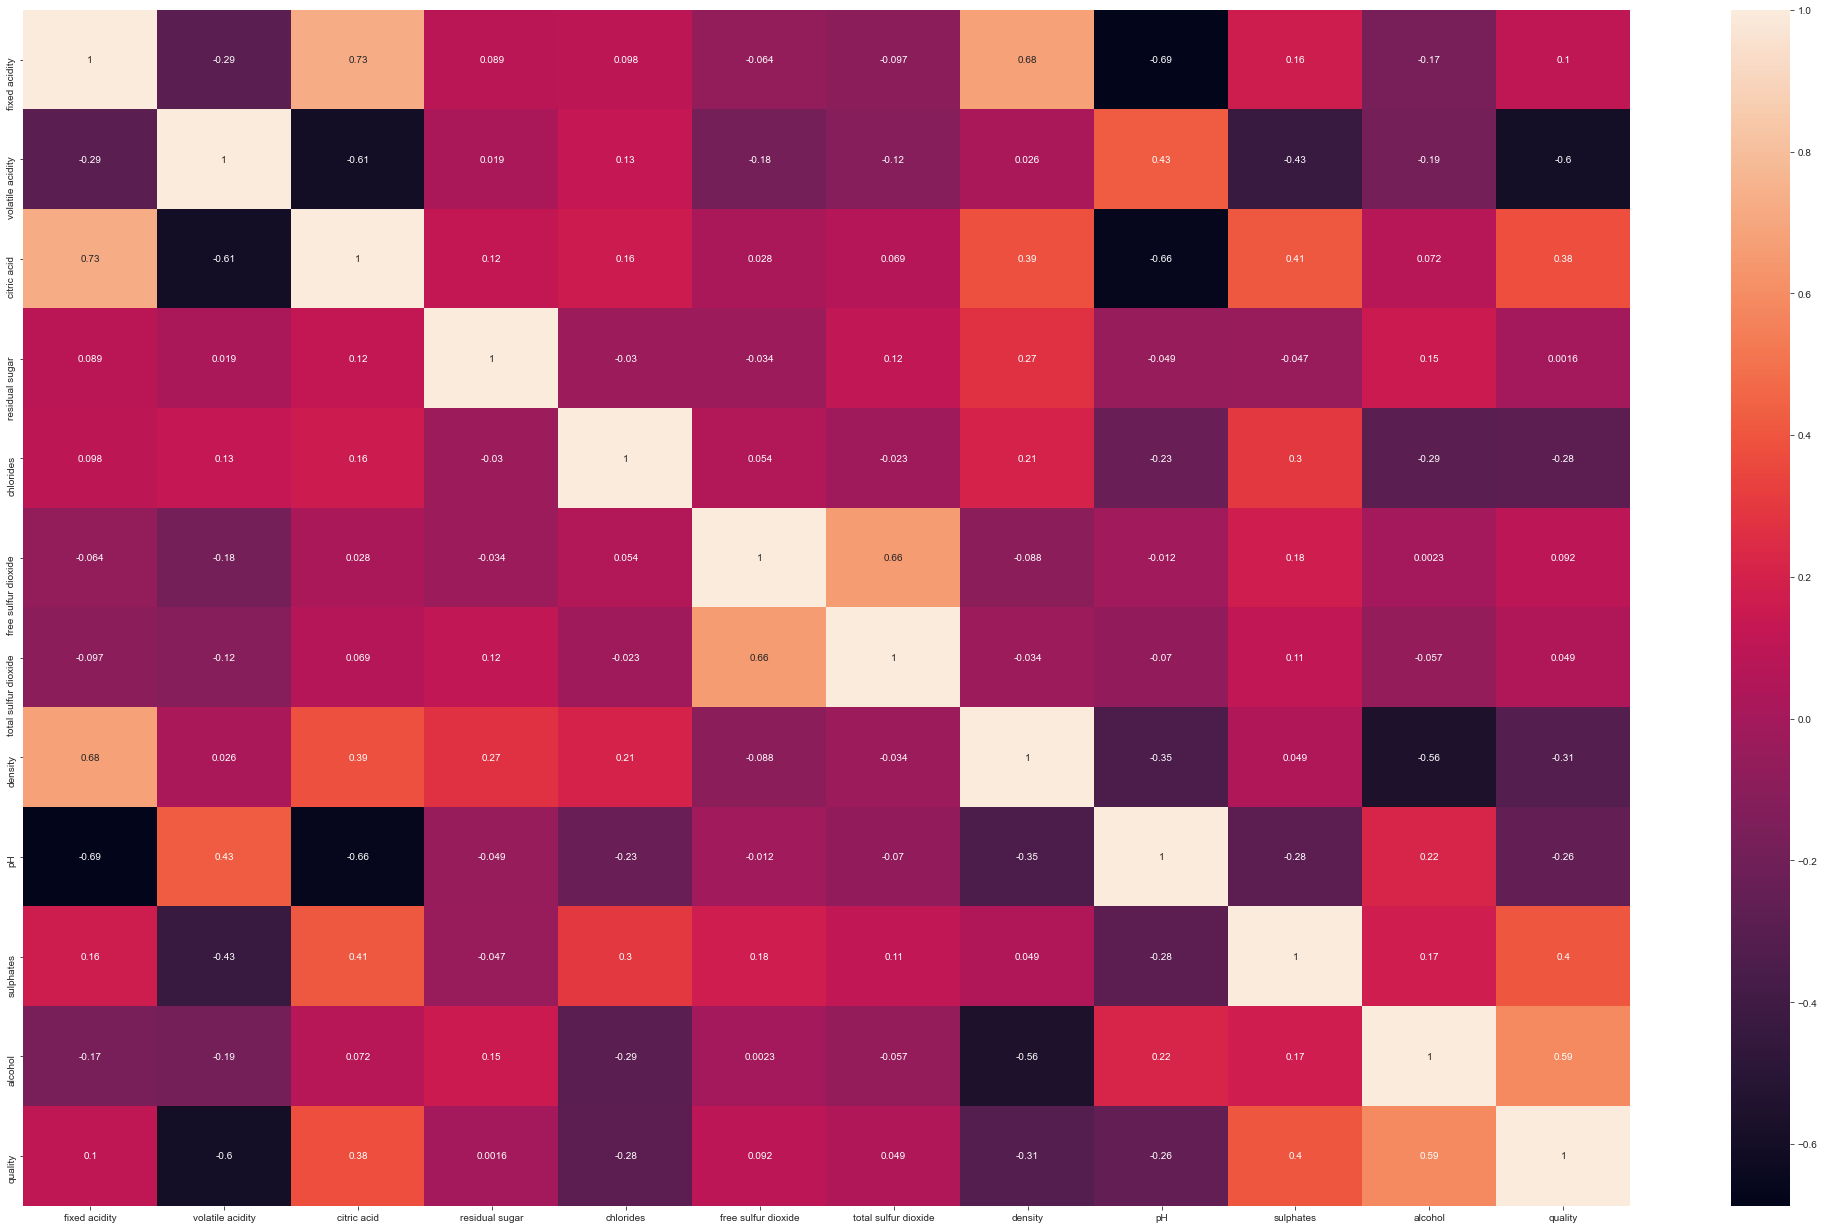

In [34]:
corr_data = Balanced_df.corr()                    
plt.figure(figsize=(36, 22))                            
sns.set_style('ticks')                                  
sns.heatmap(corr_data, annot=True)      
plt.show()

The above heatmap shows the correlation between all the columns

#### Pairplot

<Figure size 1728x720 with 0 Axes>

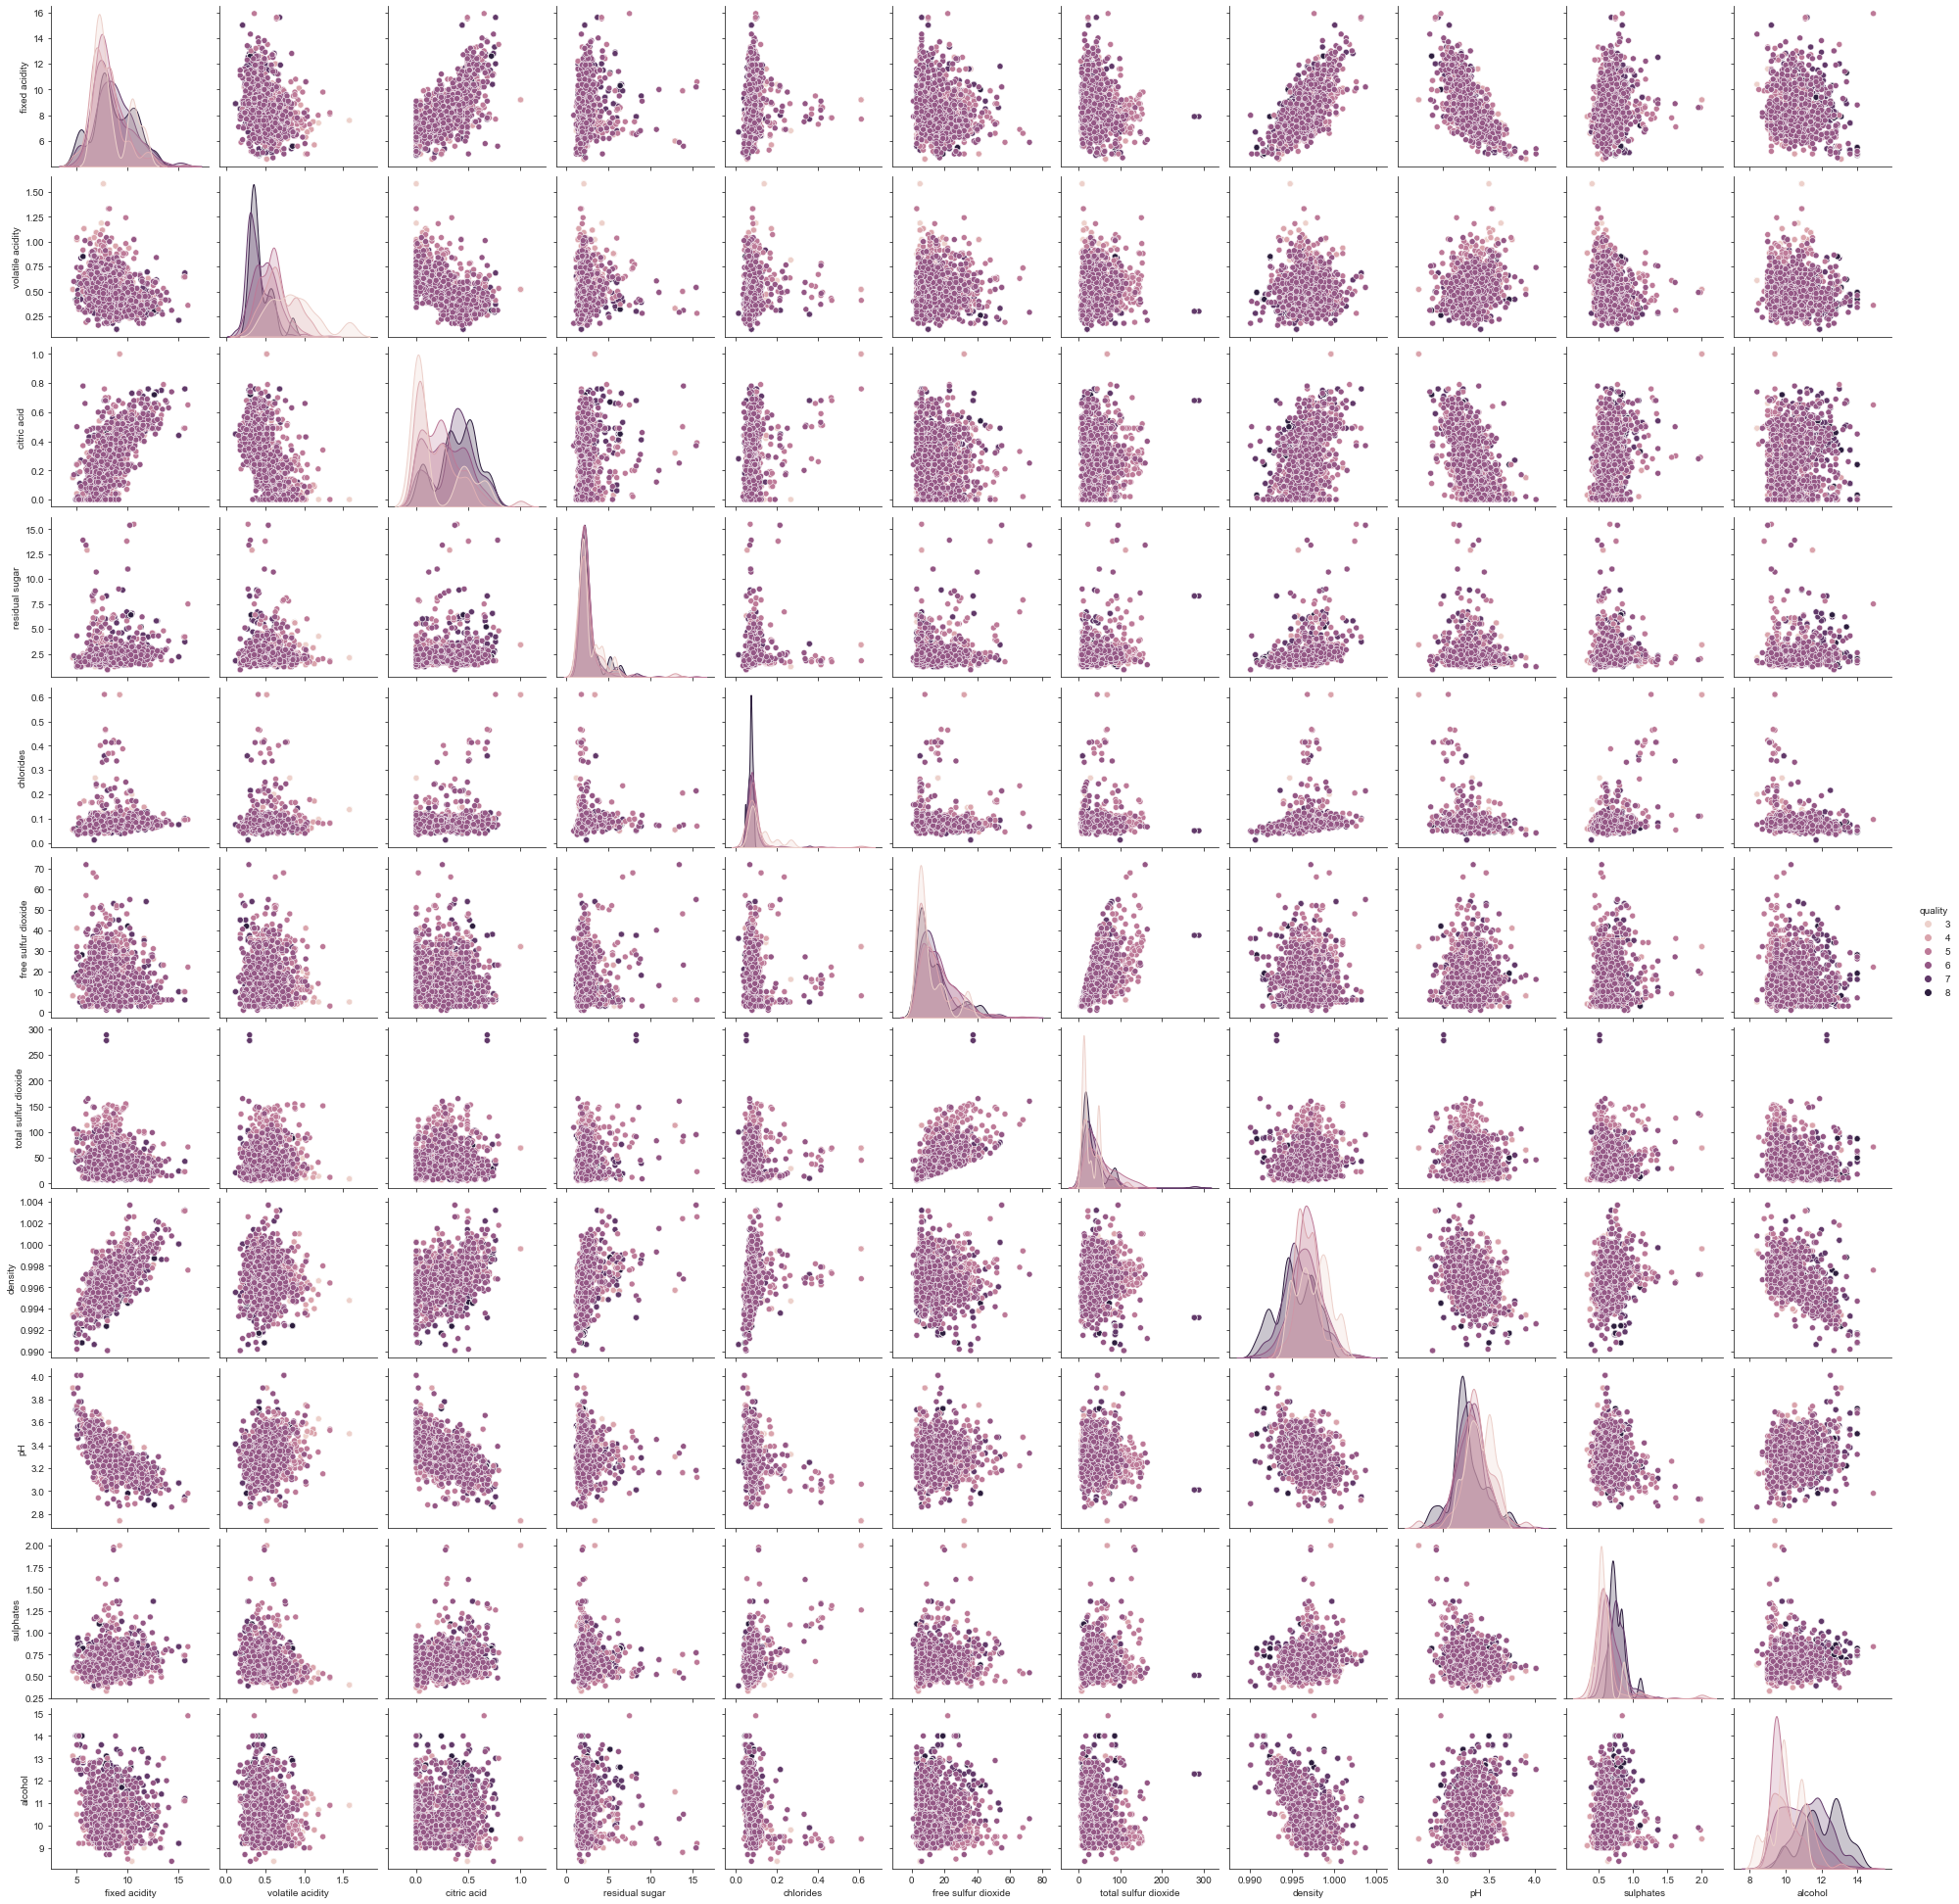

In [35]:
figure = plt.figure(figsize=(24,10))
sns.pairplot(Balanced_df,hue="quality")
plt.show()

The above pairplot shows how each column varies with the other.

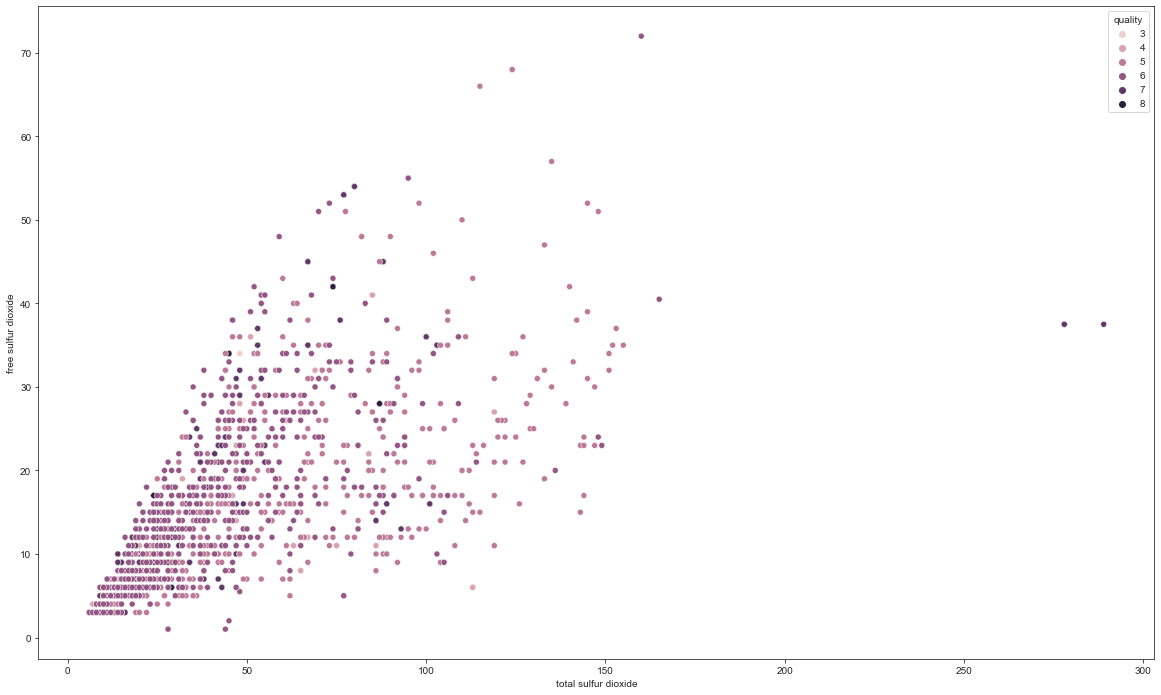

In [42]:
figure = plt.figure(figsize=(20,12))
sns.scatterplot(x="total sulfur dioxide",y="free sulfur dioxide",hue="quality", data=Balanced_df)
plt.show()

The above scatterplot show the density of total sulfur dioxide and free sulfur dioxide.

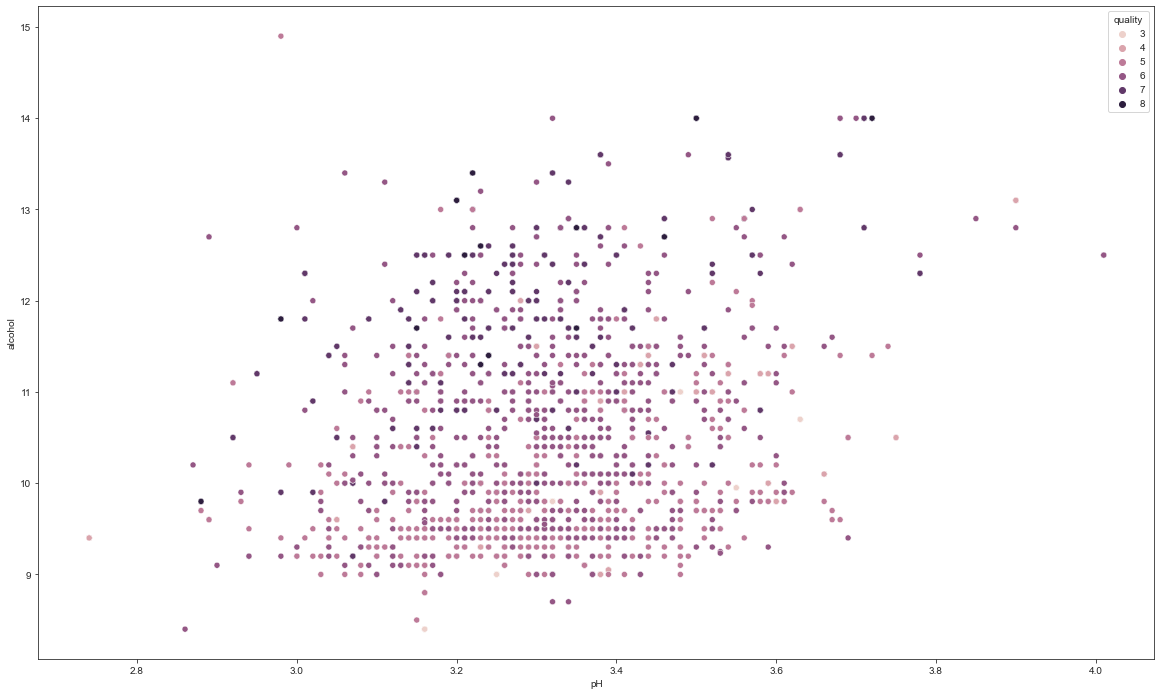

In [43]:
figure = plt.figure(figsize=(20,12))
sns.scatterplot(x="pH",y="alcohol",hue="quality",data=Balanced_df)
plt.show()

The above scatterplot show the density of pH and alcohol.

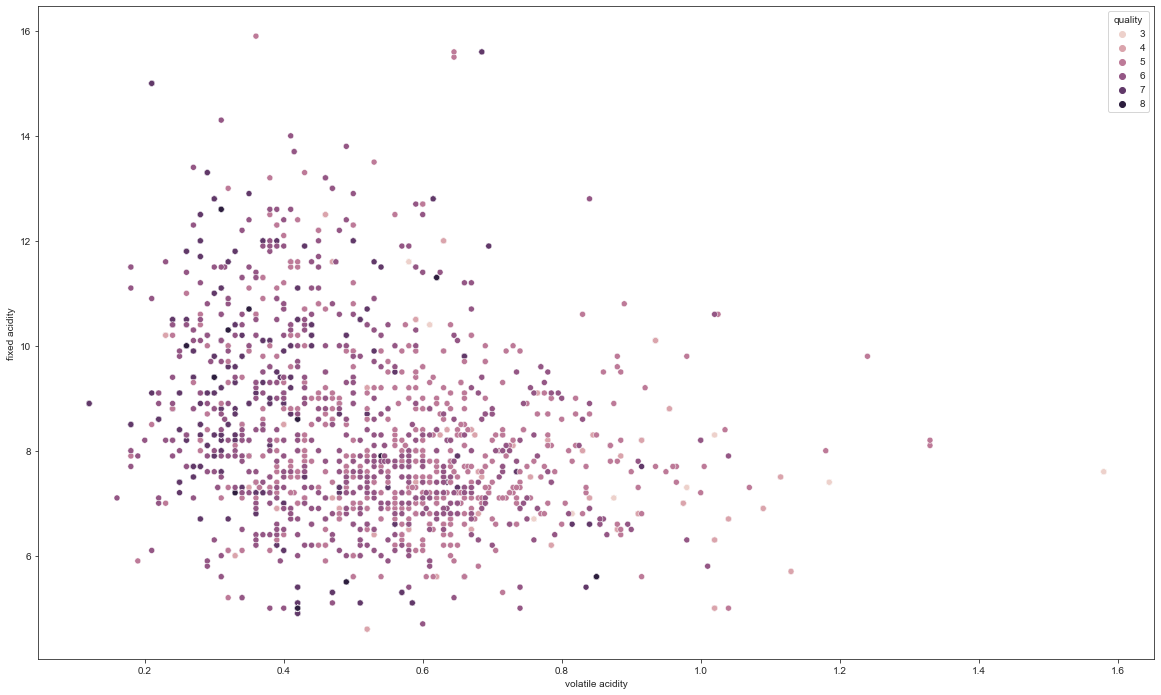

In [44]:
figure = plt.figure(figsize=(20,12))
sns.scatterplot(x="volatile acidity",y="fixed acidity",hue="quality",data=Balanced_df)
plt.show()

The above scatterplot show the density of volatile acidity and fixed acidity.

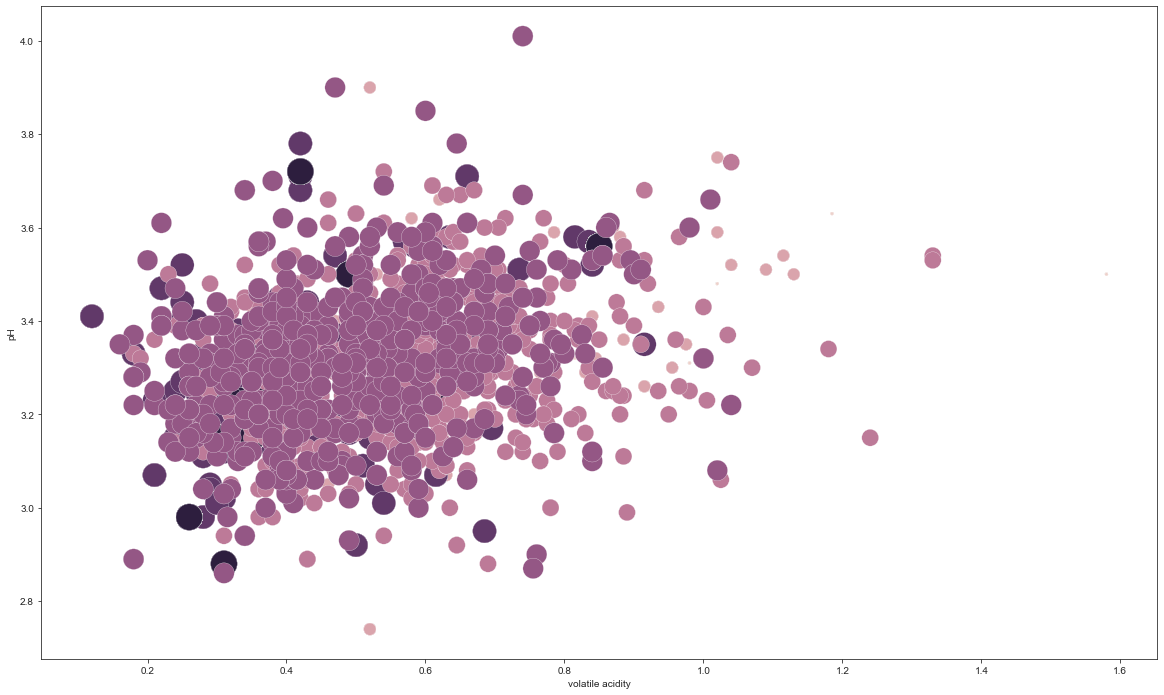

In [45]:
figure = plt.figure(figsize=(20,12))
sns.scatterplot(x="volatile acidity",y="pH",data=Balanced_df, hue="quality",size="quality",legend=False,sizes=(10, 700))
plt.show()

The above scatterplot show the density of volatile acidity and pH.

### The 10 most Important features for predicting Wine Quality.

Text(0, 0.5, 'Features')

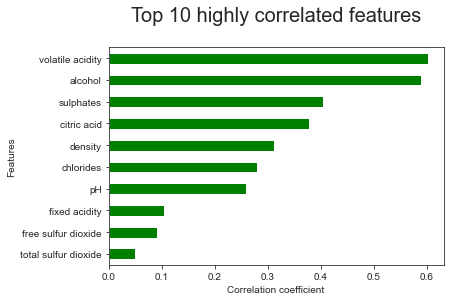

In [47]:
corr_data.quality.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:11][::-1].plot(kind='barh',color='green') 
# calculating the top 10 highest correlated features
# with respect to the target variable i.e. "quality"
plt.title("Top 10 highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

In [49]:
Balanced_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Feature Selection

In [53]:
Selected_Features = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
                     'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
                     'sulphates', 'alcohol']

### Analysing the selected features

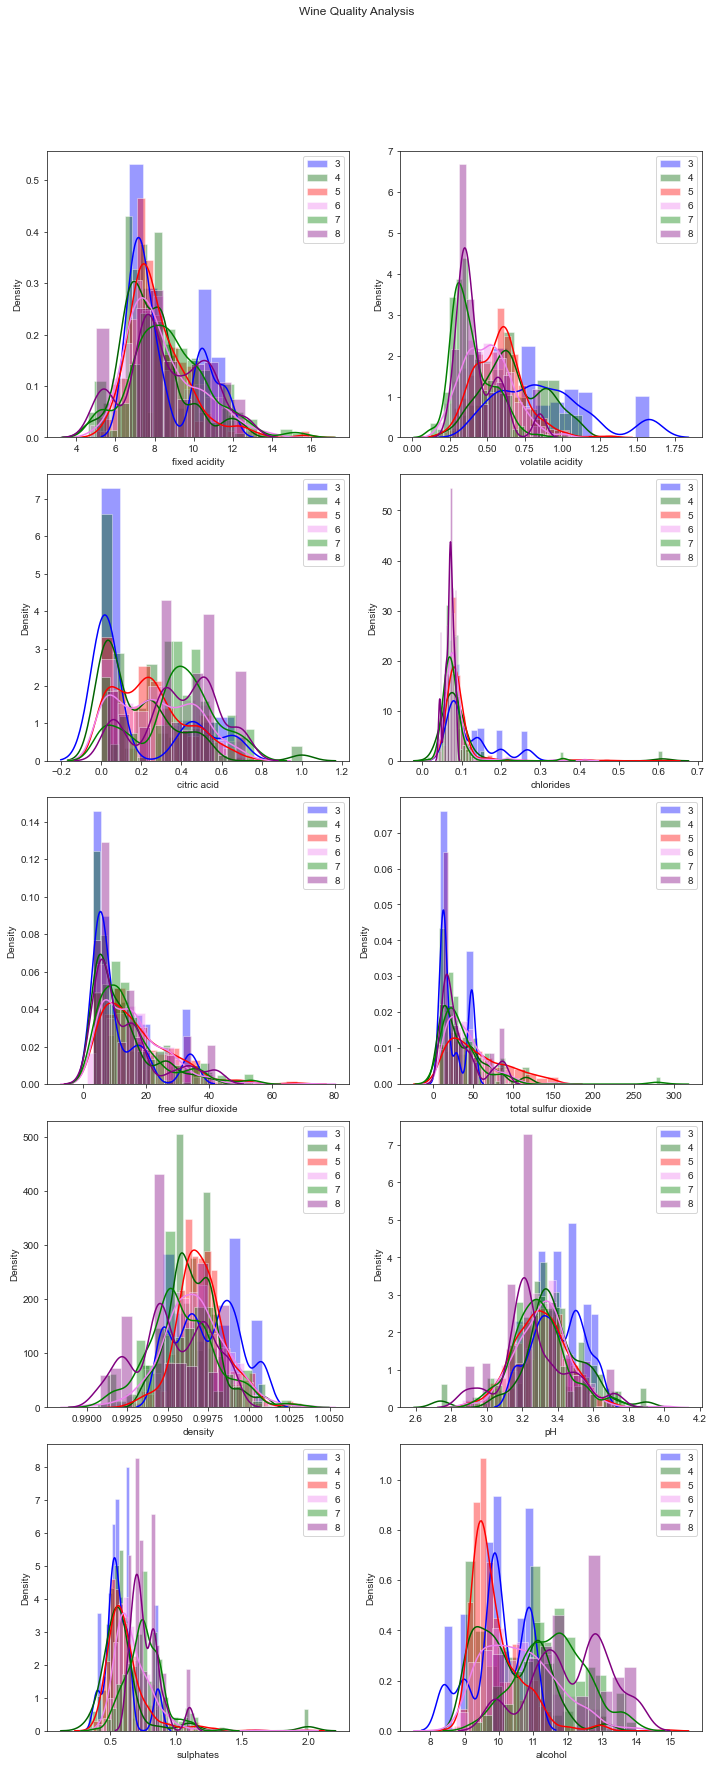

In [54]:
fig = plt.figure(figsize = (10, 25))
j = 0
for i in Selected_Features:
    plt.subplot(5, 2, j+1)
    j += 1
    sns.distplot(Balanced_df[i][Balanced_df['quality']==3], color='blue', label = '3')
    sns.distplot(Balanced_df[i][Balanced_df['quality']==4], color='darkgreen', label = '4')
    sns.distplot(Balanced_df[i][Balanced_df['quality']==5], color='red', label = '5')
    sns.distplot(Balanced_df[i][Balanced_df['quality']==6], color='violet', label = '6')
    sns.distplot(Balanced_df[i][Balanced_df['quality']==7], color='green', label = '7')
    sns.distplot(Balanced_df[i][Balanced_df['quality']==8], color='purple', label = '8')
    plt.legend(loc='best')
fig.suptitle('Wine Quality Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()

In [57]:
Balanced_df_X = Balanced_df[Selected_Features]
Balanced_df_Y = Balanced_df.quality

In [56]:
Balanced_df_X.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.8,0.815,0.00,0.267,16.0,29.0,0.99471,3.32,0.51,9.8
1,10.4,0.610,0.49,0.200,5.0,16.0,0.99940,3.16,0.63,8.4
2,7.4,1.185,0.00,0.097,5.0,14.0,0.99660,3.63,0.54,10.7
3,10.4,0.440,0.42,0.145,34.0,48.0,0.99832,3.38,0.86,9.9
4,10.4,0.440,0.42,0.145,34.0,48.0,0.99832,3.38,0.86,9.9


#### Splitting Selected dataset into 70% and 30% to construct Training data and Testing data respectively

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
trainX, testX, trainY, testY = train_test_split(Balanced_df_X, Balanced_df_Y,test_size=0.3,random_state=13)

In [61]:
trainX.shape

(2520, 10)

In [62]:
trainX.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
806,7.5,0.38,0.48,0.073,22.0,84.0,0.99720,3.32,0.70,9.6
226,10.4,0.61,0.49,0.200,5.0,16.0,0.99940,3.16,0.63,8.4
3233,11.2,0.66,0.24,0.085,16.0,53.0,0.99930,3.06,0.72,11.0
2999,9.0,0.45,0.49,0.084,21.0,75.0,0.99870,3.35,0.57,9.7
3062,7.6,0.50,0.29,0.086,5.0,14.0,0.99502,3.32,0.62,11.5


In [63]:
trainY.shape

(2520,)

In [64]:
trainY.head()

806     4
226     3
3233    6
2999    5
3062    6
Name: quality, dtype: int64

In [65]:
testX.shape

(1080, 10)

In [66]:
testY.shape

(1080,)

In [67]:
testX.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
908,9.2,0.520,1.00,0.610,32.0,69.0,0.99960,2.74,2.00,9.400000
3161,7.4,0.785,0.19,0.094,19.0,98.0,0.99713,3.16,0.52,9.566667
3549,7.2,0.490,0.18,0.069,13.0,34.0,0.99670,3.29,0.48,9.200000
2207,10.7,0.350,0.53,0.070,5.0,16.0,0.99720,3.15,0.65,11.000000
1912,9.1,0.400,0.50,0.071,7.0,16.0,0.99462,3.21,0.69,12.500000


In [68]:
testY.head()

908     4
3161    6
3549    6
2207    8
1912    8
Name: quality, dtype: int64

#### Classification

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

#### Decision Tree classification

In [74]:
dt = DecisionTreeClassifier()
dt.fit(trainX,trainY)
print("Test Accuracy: {}%".format(round(dt.score(testX,testY)*100,2)))

Test Accuracy: 87.13%


In [75]:
y_pred=dt.predict(testX)

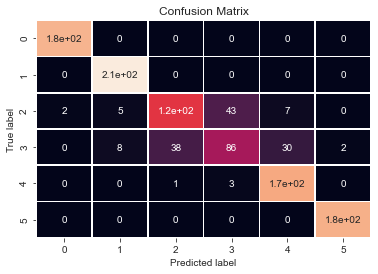

In [76]:
cmatrix=confusion_matrix(testY,y_pred)

sns.heatmap(cmatrix, annot = True,  linewidths=.8, cbar =None)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [77]:
print("Decision Tree Classifier Report \n", classification_report(testY, y_pred))

Decision Tree Classifier Report 
               precision    recall  f1-score   support

           3       0.99      1.00      0.99       178
           4       0.94      1.00      0.97       208
           5       0.75      0.68      0.71       177
           6       0.65      0.52      0.58       164
           7       0.82      0.98      0.89       177
           8       0.99      1.00      0.99       176

    accuracy                           0.87      1080
   macro avg       0.86      0.86      0.86      1080
weighted avg       0.86      0.87      0.86      1080



#### Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs")
lr.fit(trainX,trainY)
print("Test Accuracy: {}%".format(round(lr.score(testX,testY)*100,2)))

Test Accuracy: 44.72%


#### Naive Bayes Classification

In [79]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(trainX,trainY)
print("Test Accuracy: {}%".format(round(nb.score(testX,testY)*100,2)))

Test Accuracy: 49.26%


#### Random Forest Classsification

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(trainX,trainY)
print("Test Accuracy: {}%".format(round(rf.score(testX,testY)*100,2)))

Test Accuracy: 90.09%


#### KNN Classification

In [107]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue >=7
best_score >=7
for i in range(3,8):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(trainX,trainY)
    if knn.score(testX,testY) > best_score:
        best_score = knn.score(trainX,trainY)
        best_Kvalue >= 7
print("""Best KNN Value: {}
Test Accuracy: {}%""".format(best_Kvalue, round(best_score*100,2)))

Best KNN Value: 0
Test Accuracy: 89.13%


### Hyper Parameter Tuning

In [108]:
for n_neighbors in [5,10,15,20]:
    model = KNeighborsClassifier(n_neighbors)
    model.fit(trainX, trainY) 
    scr = model.score(testX, testY)
    print("For n_neighbors = ", n_neighbors  ," score is ",scr)

For n_neighbors =  5  score is  0.7675925925925926
For n_neighbors =  10  score is  0.7222222222222222
For n_neighbors =  15  score is  0.6768518518518518
For n_neighbors =  20  score is  0.649074074074074


In [109]:
for n_neighbors in [5,10,15,20]:
    model = KNeighborsClassifier(n_neighbors, weights='distance')
    model.fit(trainX, trainY) 
    scr = model.score(testX, testY)
    print("For n_neighbors = ", n_neighbors  ," score is ",scr)

For n_neighbors =  5  score is  0.8351851851851851
For n_neighbors =  10  score is  0.825925925925926
For n_neighbors =  15  score is  0.8175925925925925
For n_neighbors =  20  score is  0.8175925925925925


##### Prediction on Training Data

In [110]:
KNN_train_predictions = knn.predict(trainX)

##### Prediction on Testing Data

In [111]:
KNN_test_predictions = knn.predict(testX)

### Evaluating the Model

##### On Training

In [112]:
print("KNN_Confusion Matrix:")
print(confusion_matrix(trainY, KNN_train_predictions))

print("KNN_Classification Report:")
print(classification_report(trainY, KNN_train_predictions))

KNN_Confusion Matrix:
[[422   0   0   0   0   0]
 [  0 392   0   0   0   0]
 [  8  66 240  71  33   5]
 [  5  65  86 187  79  14]
 [  2  22  17  25 348   9]
 [  0   0   0   0   0 424]]
KNN_Classification Report:
              precision    recall  f1-score   support

           3       0.97      1.00      0.98       422
           4       0.72      1.00      0.84       392
           5       0.70      0.57      0.63       423
           6       0.66      0.43      0.52       436
           7       0.76      0.82      0.79       423
           8       0.94      1.00      0.97       424

    accuracy                           0.80      2520
   macro avg       0.79      0.80      0.79      2520
weighted avg       0.79      0.80      0.79      2520



##### On Testing

In [113]:
print("KNN_Confusion Matrix:")
print(confusion_matrix(testY, KNN_test_predictions))

print("KNN_Classification Report:")
print(classification_report(testY, KNN_test_predictions))

KNN_Confusion Matrix:
[[178   0   0   0   0   0]
 [  0 208   0   0   0   0]
 [  1  36  82  38  18   2]
 [  2  37  47  36  33   9]
 [  2  11  18  25 115   6]
 [  0   0   0   0   0 176]]
KNN_Classification Report:
              precision    recall  f1-score   support

           3       0.97      1.00      0.99       178
           4       0.71      1.00      0.83       208
           5       0.56      0.46      0.51       177
           6       0.36      0.22      0.27       164
           7       0.69      0.65      0.67       177
           8       0.91      1.00      0.95       176

    accuracy                           0.74      1080
   macro avg       0.70      0.72      0.70      1080
weighted avg       0.71      0.74      0.71      1080



### Predictions 

In [114]:
OutputDF = pd.DataFrame({'Actual Quality':testY,'Predicted Quality':KNN_test_predictions})

In [115]:
OutputDF.to_csv('quality_pred.csv',index=False)
OutputDF.head()

,Actual Quality,Predicted Quality
908,4,4
3161,6,5
3549,6,7
2207,8,8
1912,8,8


### Saving the model

In [119]:
import joblib
joblib.dump(OutputDF, "RedWine_Quality.pkl")

['RedWine_Quality.pkl']